# CS 506 BU ISE Project Solar Panel Regular Expressions

CS 506 Spring 2018

Team: 

Jason Lu (jasonlu6@bu.edu)

Hugh Qu (hughfang@bu.edu)

Zixin "Cindy" Ding (cindydxz@bu.edu)

# Proposal: 

CS 506 Final Project Proposal

CS 506 Spring 2018 

Computational Tools for Data Science 
 
Professor Adam Smith 
 
TF: Sofia Nikolakaki 2/20/2018
 
Contact: Michael Jay Walsh, Ph. D.
 
# Topic:  

Using Permit, Parcel, Census, data to populate building energy systems inventory Description of General Topic:
Our project is about using the databases provided from Carbon Free Boston in order to make an analysis of energy system changes over time for different types of Boston housing. The project will consist primarily of 3 main databases: Boston Assessor’s database of tax parcels (heating and cooling systems), Boston’s permit approval database, and a master database. In addition, we will employ the techniques taught from lecture of text mining, making a predictive model for the heating system, and use web scraping for the permit approval database. Finally, our project will answer the additional question, via measures of similarity, how well correlated is our data in comparison of the old energy system as opposed to the new energy system.

# Questions: From BU Spark:
    
1) What communities more like to have heat pumps (demographics, race, income level, etc. and geography)?
2) What communities are not benefitting from energy efficient systems?
3) How has this changed over time?

# From Our Group:

1) Does there exist a correlation between the installation of new energy system as opposed to the old energy system for Boston housing permits?
2) Will the number of people (occupants) living in Boston housing affect the heating and cooling system cost per family?

# For Michael:

1) How to access Zillow API?
2) How to access/understand the CSV entries?
3) What range of fiscal year should we use for property assessments? 4) What type of housing is inside the parcel data?

# Ideas for Specific Data Sets: Data sources:
1. Census American Housing Survey
2. Boston Building permits (text analysis for renovations involving installation of new energy systems) ( 358,472 entries, free to access)
3. Boston Property Assessments ( 170,910 entries, free to access )
4. Zillow API (description of energy systems)

# Tentative Design / Plan of Our Project: 

**Project Mockup**: on github website 

In [3]:
import csv 
import pandas as pd
from pandas import DataFrame as Df
import matplotlib.pyplot as plt
# other imports 

# Source Code:

In [24]:
# filter out for only 'SOL' and print out the comments corresponding 
work = pd.read_csv('buildingpermits.csv',encoding='latin-1')
work 

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PermitNumber,WORKTYPE,PermitTypeDescr,DESCRIPTION,Comments,APPLICANT,DECLARED_VALUATION,TOTAL_FEES,ISSUED_DATE,EXPIRATION_DATE,...,OWNER,OCCUPANCYTYPE,sq_feet,ADDRESS,CITY,STATE,ZIP,Property_ID,Parcel_ID,Location
0,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.0,429.0,11/4/11 11:04,5/4/12 0:00,...,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,2132,17268.0,2.012032e+09,"(42.260750000, -71.149610000)"
1,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.0,206.0,1/3/13 14:13,7/3/13 0:00,...,MIARA SIMON,1-2FAM,0.0,14 William Jackson AV,Brighton,MA,2135,149852.0,2.204944e+09,"(42.344600000, -71.154050000)"
2,A100764,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Interior and exterior work as indicated on dra...,Gregory Pomeroy,750000.0,7565.0,1/5/12 10:57,7/5/12 0:00,...,CARSON DAVID THOMAS TS,1-2FAM,3663.0,81 Chestnut ST,Boston,MA,2108,31492.0,5.023630e+08,"(42.356838000, -71.071231000)"
3,A100858,EXTDEM,Amendment to a Long Form,Demolition - Exterior,Landmark letter and permit submittal on existi...,Arthur Choo,0.0,20.0,8/21/12 12:27,2/21/13 0:00,...,SDS HOSPITALITY LLC,Comm,0.0,81 S Huntington AV,Jamaica Plain,MA,2199,76833.0,1.001624e+09,"(42.329910000, -71.111540000)"
4,A101019,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Amendment to add bathroom bedroom 3rd floor,JOHN MAHONY,4000.0,75.0,11/25/11 11:20,5/25/12 0:00,...,TROTMAN GERALD A,1-2FAM,1950.0,2 Clarkson ST,Dorchester,MA,2125,33505.0,1.502933e+09,"(42.309550000, -71.065430000)"
5,A101208,EXTREN,Amendment to a Long Form,Renovations - Exterior,Amending alt77244/2011 - changes being made to...,Mike Zaisser,600.0,32.0,10/21/11 15:49,4/21/12 0:00,...,SMYTHE ALICE P,1-2FAM,0.0,21-23 Lee ST,Jamaica Plain,MA,2130,84830.0,1.103034e+09,"(42.307200000, -71.111910000)"
6,A101379,INTREN,Amendment to a Long Form,Renovations -Interior NSC,Amend Long Form Permit 10-0840 As Follows: Mod...,Stephen Weinig,200000.0,2092.0,7/11/12 13:29,1/11/13 0:00,...,DYER DENNIS,Mixed,0.0,244 Newbury ST,Boston,MA,2116,101456.0,5.031610e+08,"(42.349410000, -71.082400000)"
7,A101551,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Finishing basement;as part of the first floor ...,Christine McMahon,50000.0,562.0,4/26/12 18:06,10/26/12 0:00,...,ONE-08 N STREET CONDOMINIUM,1-2FAM,680.0,108 N ST,South Boston,MA,2127,100043.0,6.042520e+08,"(42.334520000, -71.031083000)"
8,A101691,COB,Amendment to a Long Form,City of Boston,New Trash Compactor and Lift,Paul Hardiman Jr.,63444.0,669.0,11/15/11 12:01,5/15/12 0:00,...,BOSTON REDEVELOPMNT AUTH,Multi,0.0,1990 Columbus AV,Roxbury,MA,2119,35523.0,1.101630e+09,"(42.315320000, -71.097200000)"
9,A101698,OTHER,Amendment to a Long Form,Other,application to amend existing permit # ALT 767...,Garland Building Company,0.0,20.0,11/30/11 13:36,5/30/12 0:00,...,99 SUMMER OWNER LLC,Comm,1500.0,99 Summer St,Boston,MA,2110,132058.0,3.045760e+08,"(42.353490000, -71.058660000)"


In [25]:
solar_mask = work[work['WORKTYPE'].str.contains("SOL")]
solar_mask

,PermitNumber,WORKTYPE,PermitTypeDescr,DESCRIPTION,Comments,APPLICANT,DECLARED_VALUATION,TOTAL_FEES,ISSUED_DATE,EXPIRATION_DATE,...,OWNER,OCCUPANCYTYPE,sq_feet,ADDRESS,CITY,STATE,ZIP,Property_ID,Parcel_ID,Location
93,A119050,SOL,Amendment to a Long Form,Solar Panels,Correction to structural ballast for dead-load...,Ryan Albert,15000.00,173.0,2/27/12 10:01,8/27/12 0:00,...,BOSTON HOUSING AUTHORITY,7More,0.0,25 James O'neill ST,South Boston,MA,2127,341817.0,7.005400e+08,NaN
94,A119052,SOL,Amendment to a Long Form,Solar Panels,Correction to ballast for roof mounted photovo...,Ryan Albert,15000.00,173.0,2/27/12 10:44,8/27/12 0:00,...,BOSTON HOUSING AUTHORITY,7More,0.0,125 Mercer St,South Boston,MA,2127,341812.0,7.005400e+08,NaN
109,A122886,SOL,Amendment to a Long Form,Solar Panels,Installation of 9.6kW solar array and related ...,Derek Boudreau,39000.00,413.0,6/12/12 10:00,12/12/12 0:00,...,BARTLETT SQUARE CONDO,Mixed,24000.0,154-160 Green St,Jamaica Plain,MA,2130,165762.0,1.102219e+09,"(42.310430000, -71.106539000)"
414,A213657,SOL,Amendment to a Long Form,Solar Panels,Amend Permit ERT106175/2012 To Installation of...,derek quigley,61181.57,679.0,1/28/13 14:42,7/28/13 0:00,...,EDGE BRAINERD LLC,Multi,0.0,60-66 Brainerd RD,Allston,MA,2134,19432.0,2.101478e+09,"(42.347504000, -71.133154000)"
845,A339942,SOL,Amendment to a Long Form,Solar Panels,Amend drawings to reflect appropriate design p...,Rudolph Barajas,1.00,63.0,3/7/14 11:00,9/7/14 0:00,...,GBFB REALTY CORPORATION,Comm,0.0,70 S Bay AV,Roxbury/,MA,2118,8916.0,8.010270e+08,"(42.334048000, -71.065522000)"
2617,ALT100397,SOL,Long Form/Alteration Permit,Solar Panels,Install solar electric panels on the roof of e...,David Richardson,10000.00,186.0,11/23/11 10:01,5/23/12 0:00,...,TAYLOR JOSEPH TS,1-2FAM,0.0,14-18 Burnett St,Jamaica Plain,MA,2130,173039.0,1.102636e+09,"(42.304863000, -71.110005000)"
2634,ALT100586,SOL,Long Form/Alteration Permit,Solar Panels,22 solar panel installation.; Legalize occupan...,Andrea Mitter-Burke,33660.00,429.0,12/15/11 10:25,6/15/12 0:00,...,KAMENS JONATHAN I,1-2FAM,0.0,25 Foster ST,Brighton,MA,2135,59638.0,2.204192e+09,"(42.349990000, -71.157180000)"
2667,ALT101134,SOL,Long Form/Alteration Permit,Solar Panels,solar photovoltaic roof-top installation. 27.6...,Edward Whitaker,72000.00,782.0,11/28/11 14:36,5/28/12 0:00,...,BRANDYWYNE VILLAGE CO,Comm,0.0,84-86 Brandywyne DR,East Boston,MA,2128,343361.0,1.005340e+08,NaN
2897,ALT104402,SOL,Long Form/Alteration Permit,Solar Panels,Installation of a roof mounted ballast photovo...,Jason Kerr,218000.00,2239.0,1/27/12 13:15,7/27/12 0:00,...,EXTRA SPACE PROP 42 LLC,Other,0.0,3175 Washington ST,Jamaica Plain,MA,2130,144650.0,1.102009e+09,"(42.313350000, -71.100970000)"
2925,ALT104975,SOL,Long Form/Alteration Permit,Solar Panels,Install roof mounted solar hot water panels pe...,bruce dike,108936.00,1146.0,1/13/12 11:28,7/13/12 0:00,...,HAYNES HOUSE ASSOCIATES II L,7More,0.0,725-751 Shawmut AV,Mission Hill,MA,2119,126461.0,9.021600e+08,"(42.333015000, -71.083689000)"


In [26]:
# reading the columns with only 'SOL' from worktype and corresponding comments 
# print out the capacity of the solar panels / energy systems 

# getting only the worktype and comments 
solar_filter = solar_mask[['Comments','OCCUPANCYTYPE','ZIP']]
y = solar_filter['Comments'].str.findall("(\S+)kW")
y1 = y.str[0].str.replace("-","")
y2 = pd.to_numeric(y1,errors='coerce')
p = pd.concat([solar_filter['OCCUPANCYTYPE'], y2,solar_mask['ZIP']], axis=1)
m = p[p['Comments'].notnull()]
m.columns = [m.columns[0], 'kW', m.columns[2]]

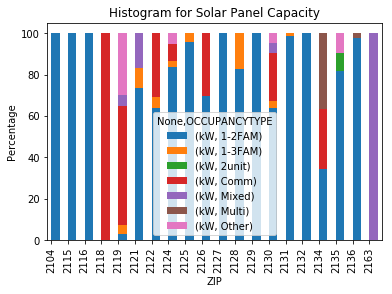

In [34]:
n = m.groupby(['ZIP','OCCUPANCYTYPE']).sum()
# convert to percentage 
p=n.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack('OCCUPANCYTYPE').fillna(0)
plt.figure(figsize=(40,20))
p.plot.bar(stacked=True, align='edge')
plt.title("Histogram for Solar Panel Capacity")
plt.ylabel("Percentage")
plt.show()

In [43]:
#n
#n.to_csv("datatocindy.csv")